## Objective : To build a machine learning regression to predict youtube adview count based on other youtube metrics

In [30]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# Define Dataframe
train = pd.read_csv("train.csv")
train.head()

,vidid,adview,views,likes,dislikes,comment,published,Pub_month,Pub_year,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,Sep,2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,Oct,2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,Jul,2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,Jul,2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,Jun,2016,PT31S,D


In [17]:
train.shape

(14999, 11)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   Pub_month  14999 non-null  object
 8   Pub_year   14999 non-null  int64 
 9   duration   14999 non-null  object
 10  category   14999 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [19]:
# check Null Value in the data
train.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
Pub_month    0
Pub_year     0
duration     0
category     0
dtype: int64

In [20]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,Pub_month,Pub_year,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,Sep,2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,Oct,2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,Jul,2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,Jul,2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,Jun,2016,PT31S,D


C:\Users\vinay\AppData\Local\Temp\ipykernel_3156\715292675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=train.corr(), annot=True)


<AxesSubplot: >

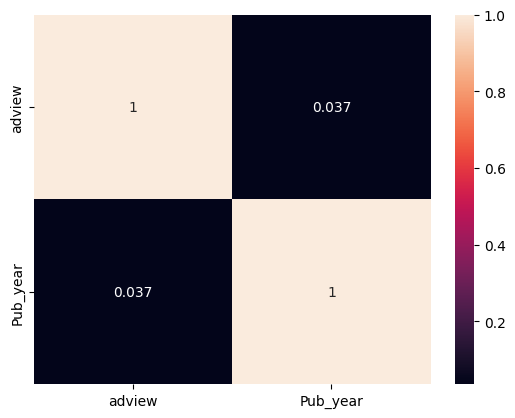

In [21]:
from seaborn import heatmap
heatmap(data=train.corr(), annot=True)

In [22]:
#Encoding Column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['Pub_month', 'category','duration']:
  train[col] = le.fit_transform(train[col])
train.head()

,vidid,adview,views,likes,dislikes,comment,published,Pub_month,Pub_year,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,11,2016,2993,5
1,VID_14135,2,1707,56,2,6,01-10-2016,10,2016,3108,3
2,VID_2187,1,2023,25,0,2,02-07-2016,5,2016,1910,2
3,VID_23096,6,620860,777,161,153,27-07-2016,5,2016,2603,7
4,VID_10175,1,666,1,0,0,29-06-2016,6,2016,2018,3


In [23]:
for i in train.columns:
    train = train[train[i]!='F']

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  object
 3   likes      14637 non-null  object
 4   dislikes   14637 non-null  object
 5   comment    14637 non-null  object
 6   published  14637 non-null  object
 7   Pub_month  14637 non-null  int32 
 8   Pub_year   14637 non-null  int64 
 9   duration   14637 non-null  int32 
 10  category   14637 non-null  int32 
dtypes: int32(3), int64(2), object(6)
memory usage: 1.2+ MB


In [25]:
train = train.drop('published', axis=1)

In [26]:
train.head()

,vidid,adview,views,likes,dislikes,comment,Pub_month,Pub_year,duration,category
0,VID_18655,40,1031602,8523,363,1095,11,2016,2993,5
1,VID_14135,2,1707,56,2,6,10,2016,3108,3
2,VID_2187,1,2023,25,0,2,5,2016,1910,2
3,VID_23096,6,620860,777,161,153,5,2016,2603,7
4,VID_10175,1,666,1,0,0,6,2016,2018,3


In [32]:
# Get the column names from the DataFrame
column_names = train.columns

# Create all possible combinations of columns
column_combinations = list(itertools.combinations(column_names, 2))

# Calculate the number of subplots needed
num_plots = len(column_combinations)

# Calculate the number of rows and columns for subplots
num_cols = 3  # Adjust as needed
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array if needed
axes = axes.flatten()

# Loop through column combinations and create scatter plots
for i, (col1, col2) in enumerate(column_combinations):
    ax = axes[i]
    ax.scatter(train[col1], train[col2], label=f'{col1} vs {col2}')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.legend()

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [28]:

# columns_ = list(train)

# # Plot a scatter plot of each column against each other
# for i in range(len(columns_)):
#   for j in range(i + 1, len(columns_)):
#     plt.scatter(train[columns_[i]], train[columns_[j]])
#     plt.xlabel(columns_[i])
#     plt.ylabel(columns_[j])
#     plt.show()

## training an linear regression model

In [13]:
#training an linear regression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [14]:
#spilt into train test model
x = train.iloc[:,1:-1]
y = train.iloc[:,-1]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [16]:
print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train : (11709, 8)
x_test : (2928, 8)
y_train : (11709,)
y_test : (2928,)


In [17]:
LR.fit(x_train,y_train)

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
pred_LR = LR.predict(x_test)

In [19]:
LR.score(pred_LR,y_test)

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3 3 3 ... 3 3 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
# SVM Model
from sklearn import svm
svm = svm.SVR()

In [21]:
svm.fit(x_train, y_train)

SVR()

In [24]:
y_test = y_test.values.reshape(-1,1)

In [30]:
y_pred_svm = svm.predict(y_test)
print("y_pred_svm : ",y_pred_svm)
print("accuracy_score : ", accuracy_score(x_test, y_pred_svm, normalize=False))

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but SVR is expecting 8 features as input.

### Using Decision tree regresson and random forest regressor

In [66]:
# import libraries 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# covert the numbers in binary
y_train_binary = np.where(y_train > 0.5, 1, 0)
y_test_binary = np.where(y_test > 0.5, 1, 0)

In [68]:

regressor = DecisionTreeRegressor(random_state=10)
regressor.fit(x_train,y_train_binary)

DecisionTreeRegressor(random_state=10)

In [69]:
y_pred_Decision = regressor.predict(x_test)

In [70]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_Decision)

# Calculate the mean squared error
mse = mean_squared_error(y_test_binary, y_pred_Decision)

# Calculate the R-squared score
r2 = r2_score(y_test_binary, y_pred_Decision)

# Print the results
print("Accuracy:", accuracy)
print("MSE:", mse)
print("R-squared:", r2)

Accuracy: 0.9556010928961749
MSE: 0.04439890710382514
R-squared: -1.015119750968807


### Random forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
# Create the random forest regressor
regressor2 = RandomForestRegressor(n_estimators=100, random_state=14)
regressor2.fit(x_train, y_train_binary)

RandomForestRegressor(random_state=14)

In [113]:
y_pred_Random = regressor2.predict(x_test)

In [114]:
y_pred_Random = np.where(y_test > 0.5, 1, 0)

In [115]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_Random)

In [116]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_Random)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_Random)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_Random)

# Print the results
print("Accuracy:", accuracy)
print("MSE:", mse)
print("R-squared:", r2)

Accuracy: 0.08367486338797814
MSE: 9.207991803278688
R-squared: -2.826951857088389


## Artificial neural network 

In [122]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

In [118]:
# Create the model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [119]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [125]:
# Convert the integers in the NumPy array to floating-point numbers
X_train_arr = x_train.astype("float32")
X_test_arr = x_test.astype("float32")

In [131]:
# Train the model
model.fit(X_train_arr, y_train, epochs=10, batch_size=10)

Epoch 1/10


1171/1171 [==============================] - 6s 5ms/step - loss: -39794885263360.0000 - accuracy: 0.0676
Epoch 2/10
1171/1171 [==============================] - 5s 5ms/step - loss: -52033419739136.0000 - accuracy: 0.0676
Epoch 3/10
1171/1171 [==============================] - 5s 5ms/step - loss: -65736034746368.0000 - accuracy: 0.0676
Epoch 4/10
1171/1171 [==============================] - 6s 5ms/step - loss: -80781338738688.0000 - accuracy: 0.0676
Epoch 5/10
1171/1171 [==============================] - 6s 5ms/step - loss: -98517397798912.0000 - accuracy: 0.0676
Epoch 6/10
1171/1171 [==============================] - 6s 5ms/step - loss: -118611226132480.0000 - accuracy: 0.0676
Epoch 7/10
1171/1171 [==============================] - 5s 5ms/step - loss: -140160125632512.0000 - accuracy: 0.0676
Epoch 8/10
1171/1171 [==============================] - 6s 5ms/step - loss: -164501005533184.0000 - accuracy: 0.0676
Epoch 9/10
1171/1171 [==============================] - 6s 5ms/step - loss: -191

In [127]:
# Evaluate the model
score = model.evaluate(X_test_arr, y_test, verbose=0)
print("Accuracy:", score[1])

Accuracy: 0.06113388016819954


In [129]:
# Experiment with different layers and hyperparameters
for i in range(1, 3):
    model = Sequential()
    model.add(Dense(128 * i, activation="relu", input_shape=(X_train_arr.shape[1],)))
    model.add(Dense(64 * i, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train_arr, y_train, epochs=10, batch_size=100)
    score = model.evaluate(X_test_arr, y_test, verbose=0)
    print("Accuracy (%d layers):" % i, score[1])

Epoch 1/10
118/118 [==============================] - 2s 3ms/step - loss: -12035086.0000 - accuracy: 0.0666
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: -195167536.0000 - accuracy: 0.0676
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: -919958080.0000 - accuracy: 0.0676
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: -2613108224.0000 - accuracy: 0.0676
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: -5648224768.0000 - accuracy: 0.0676
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: -10279290880.0000 - accuracy: 0.0676
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: -16819067904.0000 - accuracy: 0.0676
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: -25612523520.0000 - accuracy: 0.0676
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: -36716781568.0000 - accuracy: 0.0676
Epoch 10/1